In [4]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
from functions.embedding_quality import embedding_quality
from functions.plot_embedding import plot_embed

import openTSNE
from openTSNE import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Tasic et al. data
tasic_colors = np.load('data/tasic/tasic-colors.npy')
tasic_pca50 = np.load('data/tasic/tasic-pca50.npy')
tasic_ttypes = np.load('data/tasic/tasic-ttypes.npy')

tasic_pca2 = tasic_pca50[:, :2]
tasic_pca2_scaled = tasic_pca2 / tasic_pca2[:,0].std() * 0.0001
tasic_pca2_scaled_eval = embedding_quality(tasic_pca2_scaled, tasic_pca50, tasic_ttypes)

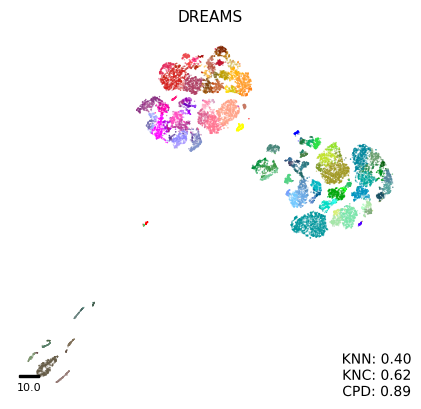

In [5]:
# Perform DREAMS
embedder = TSNE(initialization=tasic_pca2_scaled, regularization=True, reg_lambda=0.1, reg_embedding=tasic_pca2_scaled)
embd = embedder.fit(tasic_pca50)
eval = embedding_quality(embd, tasic_pca50, tasic_ttypes)
plot_embed(embd, eval, tasic_colors, title=f"DREAMS", add_scale_plot=True)

In [6]:
# default openTSNE
embedder_default = TSNE()
embd_default = embedder_default.fit(tasic_pca50)
eval_default = embedding_quality(embd_default, tasic_pca50, tasic_ttypes)

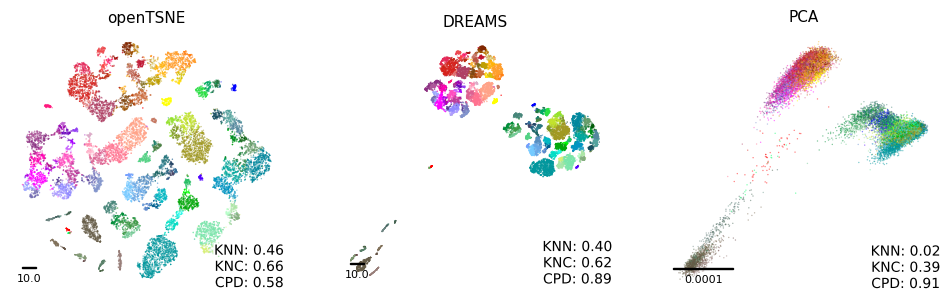

In [7]:
# plot comparison
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
plot_embed(embd_default, eval_default, tasic_colors, title=f"openTSNE", add_scale_plot=True, ax=ax[0])
plot_embed(embd, eval, tasic_colors, title=f"DREAMS", add_scale_plot=True, ax=ax[1])
plot_embed(tasic_pca2_scaled, tasic_pca2_scaled_eval, tasic_colors, title=f"PCA", add_scale_plot=True, ax=ax[2])